In [ ]:
import sys
import pickle

sys.path.append('..')

from utilities import configuration
config = configuration.get_config()

In [30]:
# experiment_configurations = json.load(open(config['experiments_config'], encoding='utf-8'))
# X_train, y_train, X_test, y_test, columns = health_data.Admission.get_train_test_matrices(experiment_configurations['configuration_82'])
print(X_train.shape)

(419139, 13656)


In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier
from_disk = True

if from_disk:
    brf = joblib.load(config['balanced_random_forest_path'])
else:

    brf = BalancedRandomForestClassifier(n_estimators=500, 
                                        sampling_strategy='majority', 
                                        replacement=True, 
                                        class_weight='balanced_subsample')
    brf.fit(X_train, y_train)

In [37]:
from sklearn.metrics import roc_auc_score
print(f'AUC={roc_auc_score(y_true=y_test, y_score=brf.predict_proba(X_test)[:,1])}')

AUC=0.7343309222440836


In [62]:
sampled_X = shap.utils.sample(X_test,
                         100).toarray()  # 5000 instances for use as the background distribution

# X5000 = pd.DataFrame(X5000.toarray(), columns=columns)
sampled_X

array([[1.9000e+01, 2.7800e+02, 6.6440e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.6000e+01, 4.8700e+02, 3.5089e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.3000e+01, 2.5700e+02, 3.3530e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [6.4000e+01, 2.6000e+01, 1.2106e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.8000e+01, 7.0800e+02, 5.9890e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.7000e+01, 8.1600e+02, 2.2371e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [71]:
columns[:25]

array(['age', 'cmg', 'case_weight', 'acute_days', 'alc_days', 'male',
       'female', 'transfusion given', 'is alc', 'is central zone',
       'elective admission', 'urgent admission', 'level 1 comorbidity',
       'level 2 comorbidity', 'level 3 comorbidity',
       'level 4 comorbidity', 'Clinic Entry', 'Direct Entry',
       'Emergency Entry', 'Day Surgery Entry', 'New Acute Patient',
       'Panned Readmit', 'Unplanned Readmit', 'COVID Pandemic',
       'Respirology'], dtype='<U30')

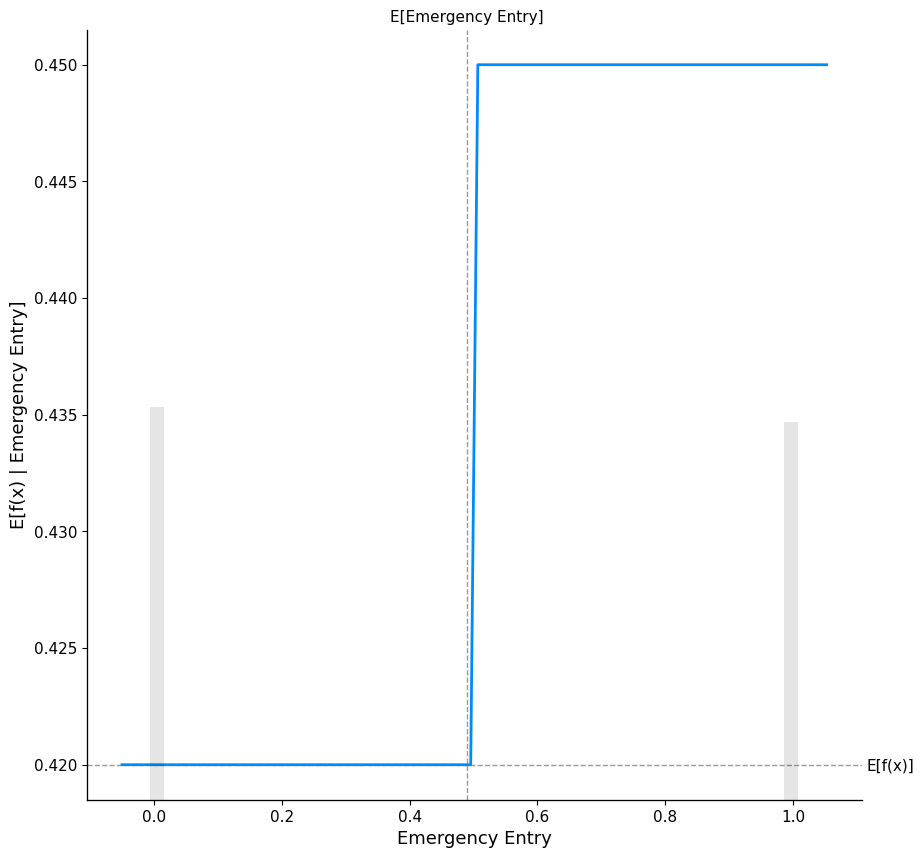

In [72]:
fig, ax = plt.subplots(1, figsize=(10,10))
shap.partial_dependence_plot(
    "Emergency Entry",
    brf.predict,
    sampled_X,
    feature_names=columns,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
    ax=ax
)

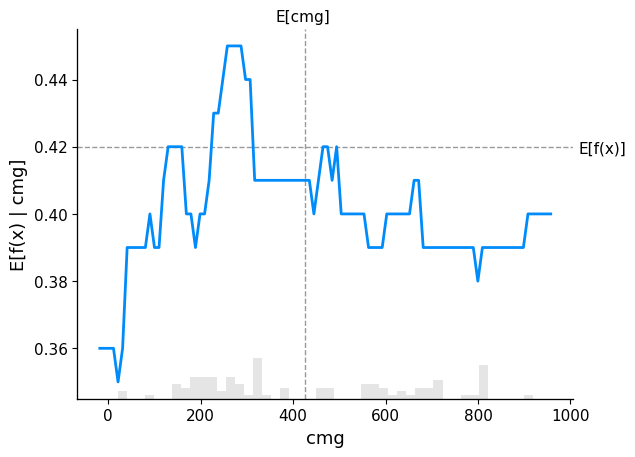

In [63]:
shap.partial_dependence_plot(
    "cmg",
    brf.predict,
    sampled_X,
    feature_names=columns,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

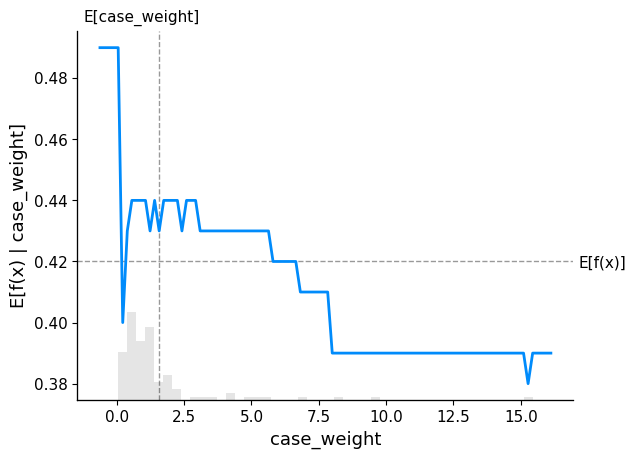

In [64]:
shap.partial_dependence_plot(
    "case_weight",
    brf.predict,
    sampled_X,
    feature_names=columns,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

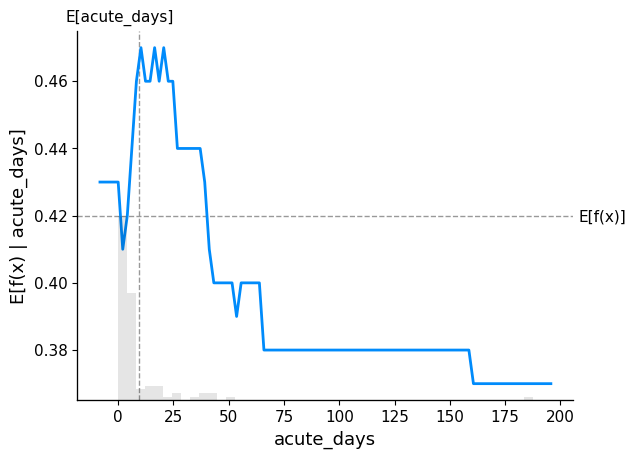

In [65]:
shap.partial_dependence_plot(
    "acute_days",
    brf.predict,
    sampled_X,
    feature_names=columns,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

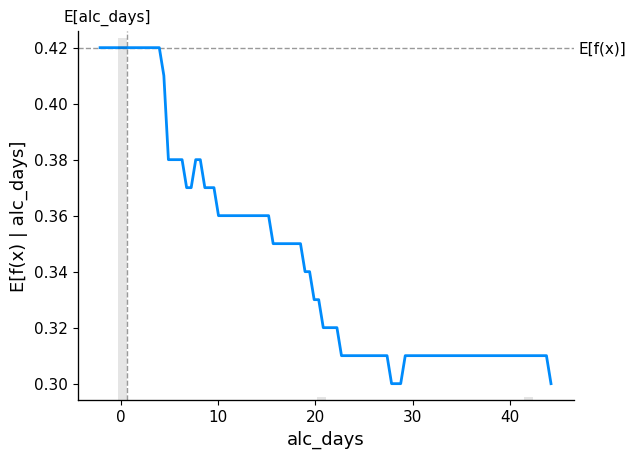

In [66]:
shap.partial_dependence_plot(
    "alc_days",
    brf.predict,
    sampled_X,
    feature_names=columns,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [21]:
with open(config['housing_data'], 'rb') as reader:
    X, y = pickle.load(reader)

In [39]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [24]:
import sklearn

import shap


X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [25]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


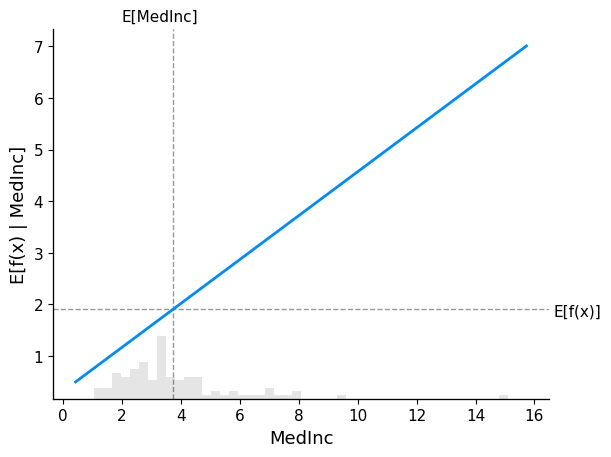

In [26]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import joblib
import json
import sys 
sys.path.append('..')

from utilities import health_data
from utilities import configuration

config = configuration.get_config()
print('configuration loaded')

configuration loaded
